<a href="https://colab.research.google.com/github/chocobearz/SASSA-Sklean/blob/main/sassa_sklean_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this workshop we will use the sklearn library to implement some of the major algorithms used for regression and touch on hyperparameter tuning. 


We will cover the following types of regression:

* Simple Linear Regression
* Nearest Neighbour Regression
* Support Vector Regression (SVR)

Pre reqs include basic knowledge of
* `pandas`
* `numpy`



Environment set up

In [ ]:
# Global Imports
import numpy as np   # linear algebra
import pandas as pd
import matplotlib.pyplot as plt   # plotting
from sklearn.model_selection import train_test_split  # ML data splits
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # ML preprocessing

Follow the same steps for each type of regression:


1.   import algorithm from sklean
2.   select independent and dependent variables
3.   split data into test, train, and validation set
4.   train model
5.   adjust model based on vaidtion set
6.   evaluate the model on the test set



We are using a salary dataset that contains employee's years of experince and their salary

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mesushan/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv', encoding='latin')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Linear Regression

In [ ]:
# Import Algorithm
from sklearn.linear_model import LinearRegression

Preparing the dataset will be the same for all the model

In [ ]:
# Separate the features (X) and target (y)
# Reshape so each item is a list of features/targets
X = dataset['YearsExperience'].values.reshape(-1, 1)
y = dataset['Salary'].values.reshape(-1, 1)

In sklean a 1d array needs to be reshaped as shown above

In [ ]:
# Split into training, test sets (80%, 20%)
X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Split train_val sets into separate training and validation sets
# Final split is 60% train, 20% validation, and 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Train the model

In [ ]:
# Initialize the linear regression model
linear_regressor = LinearRegression()
# Train the model on the training data
linear_regressor.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check the performance of the model with the [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) method and plotting

Training Score: 0.9307377112009063
Validation Score: 0.954982649907712


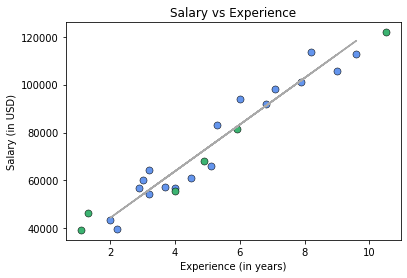

In [ ]:
# Find Score (Max is 1)
print("Training Score: {}".format(linear_regressor.score(X_train, y_train)))
print("Validation Score: {}".format(linear_regressor.score(X_val, y_val)))

# Plot points and fit line for training data
plt.scatter(X_train, y_train, s=50, color='CornflowerBlue', edgecolor='black', lw=0.5, label='Training-set observation points')
plt.scatter(X_val, y_val, s=50, color='MediumSeaGreen', edgecolor='black', lw=0.5, label='Training-set observation points')
plt.plot(X_train, linear_regressor.predict(X_train), color='darkgrey', label='Fit Regression Line')
plt.title('Salary vs Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in USD)')
plt.show()

Test it out!

In [ ]:
# Use the trained model to predict values on the test set
y_predict = linear_regressor.predict(X_test)

Testing Score: 0.9890056653213621


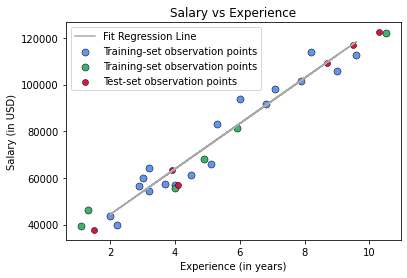

In [ ]:
# Find Score (Max is 1)
print("Testing Score: {}".format(linear_regressor.score(X_test, y_test)))

# Plot points and fit line for training data
# (Same as cell from above)
# Plot points and fit line for training data
# Plot points and fit line for training data
plt.scatter(X_train, y_train, s=50, color='CornflowerBlue', edgecolor='black', lw=0.5, label='Training-set observation points')
plt.scatter(X_val, y_val, s=50, color='MediumSeaGreen', edgecolor='black', lw=0.5, label='Training-set observation points')
plt.plot(X_train, linear_regressor.predict(X_train), color='darkgrey', label='Fit Regression Line')
plt.title('Salary vs Experience')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary (in USD)')

# plot scatter points and line for test data
plt.scatter(X_test, y_test, color='crimson', edgecolors='black', lw=0.5, label='Test-set observation points')
plt.legend()
plt.show()

## KNN Regression

In [ ]:
# Import Algorithm
from sklearn.neighbors import KNeighborsRegressor

Same as before

In [ ]:
# Read in the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mesushan/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv', encoding='latin')

# Separate the features (X) and target (y)
# Reshape so each item is a list of features/targets
X = dataset['YearsExperience'].values.reshape(-1, 1)
y = dataset['Salary'].values.reshape(-1, 1)

# Split into training, test sets (80%, 20%)
X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Split train_val sets into separate training and validation sets
# Final split is 60% train, 20% validation, and 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Your turn! [Follow this](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Use defaults

In [ ]:
# Initialize the knn regression model


# Train the model on the training data



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Check score on training and validation

In [ ]:
# Find Score (max is 1)
print("Training Score: {}".format(knn_regressor.score(X_train, y_train)))
print("Validation Score: {}".format(knn_regressor.score(X_val, y_val)))

# Create table to show differences in predicted salary
results = pd.DataFrame()
results['Experience'] = X_val.reshape(-1)
results['True Salary'] = y_val.reshape(-1)
results['Predicted Salary'] = knn_regressor.predict(X_val).reshape(-1)
results

Training Score: 0.9212027165771288
Validation Score: 0.8835056943491592


,Experience,True Salary,Predicted Salary
0,10.5,121872.0,106320.8
1,1.3,46205.0,52930.6
2,4.9,67938.0,72225.0
3,5.9,81363.0,86613.6
4,1.1,39343.0,52930.6
5,4.0,55794.0,58829.4


Training is better... what do we do?
Tune the hyper parameters!

In [ ]:
# Initialize the knn regression model
knn_regressor = KNeighborsRegressor(n_neighbors=2) # THIS LINE

# Train the model on the training data
knn_regressor.fit(X_train, y_train)

# Find Score (max is 1)
print("Training Score: {}".format(knn_regressor.score(X_train, y_train)))
print("Validation Score: {}".format(knn_regressor.score(X_val, y_val)))

Training Score: 0.963422254213486
Validation Score: 0.9369108936074926


Check testing score. Will differ based on hyperparemeters you tune

In [ ]:
# Use the trained model to predict values on the test set
y_predict = knn_regressor.predict(X_test)

# Find Score (Max is 1)
print("Testing Score: {}".format(knn_regressor.score(X_test, y_test)))

Testing Score: 0.9551230640169661


# SVM Regression

In [ ]:
# Import Algorithm
from sklearn.svm import SVR

Same as before... wait... nope
We have to scale! SVR does not do this automatically like the others do... please don't ask me why...

In [ ]:
# Read in the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mesushan/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv', encoding='latin')

# Separate the features (X) and target (y)
# Reshape so each item is a list of features/targets
X = dataset['YearsExperience'].values.reshape(-1, 1)
y = dataset['Salary'].values.reshape(-1, 1)


# *****   NEW   *****
scale_X = StandardScaler()
scale_y = StandardScaler()
X = scale_X.fit_transform(X)
y = scale_y.fit_transform(y).reshape(-1)
# ***** ^ NEW ^ *****

# Split into training, test sets (80%, 20%)
X_train_val, X_test, y_train_val, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

# Split train_val sets into separate training and validation sets
# Final split is 60% train, 20% validation, and 20% testing
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Train and get validation score

Training Score: 0.927041447524215
Validation Score: 0.9688613633505705


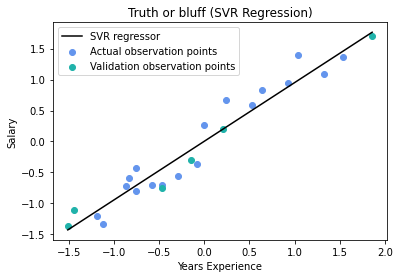

In [ ]:
# Initialize the SVR
svr_regressor = SVR(kernel = 'linear')

# Train the model
svr_regressor.fit(X_train, y_train)

# Find Score (max is 1)
print("Training Score: {}".format(svr_regressor.score(X_train, y_train)))
print("Validation Score: {}".format(svr_regressor.score(X_val, y_val)))

# Plot
plt.scatter(X_train, y_train, color='cornflowerblue', label='Actual observation points')
plt.scatter(X_val, y_val, color='lightseagreen', label='Validation observation points')
plt.plot(X, svr_regressor.predict(X), label='SVR regressor', color='black')
plt.title('Truth or bluff (SVR Regression)')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Your turn! [follow this](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

You can go back and change some hyper parameters as well... try a different kernel!

In [ ]:
# Use the model to get predictions for the test set

# Use `score()` to find the score the model gets on the test data

# BONUS: Plot the test set observations in comparison with the function the model learned to use. 

Why do we need to scale?

In [ ]:
# Step 1
scaled_exp = scale_X.transform(np.array([[9.8]]))
print(scaled_exp)

# Step 2
scaled_prediction = svr_regressor.predict(scaled_exp)
print(scaled_prediction)

# Step 3
predicted_sal = scale_y.inverse_transform(scaled_prediction)
print(predicted_sal)